# 회귀 분석 예제 : Naver Book Price

<br></br>

## --▶ 책 가격 정보 얻기

- Naver API를 이용한 웹 크롤링 방식으로 정보를 가져온다.

#### ◾ __`gen_search_url()`__

In [1]:
import urllib

# URL 생성 함수
def gen_search_url(api_node, search_text, start_num, disp_num):
    """
    - api_node : 쇼핑, 블로그, 카페 등 어디에서 검색할 것인지
    - search_text : 검색어
    - start_num : 검색 시작 위치
    - disp_num : 한 번에 표시할 검색 결과 개수
    """
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

gen_search_url('book', '파이썬', 10, 3)

'https://openapi.naver.com/v1/search/book.json?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&start=10&display=3'

#### ◾ __`get_result_onepage()`__

In [2]:
import json
import datetime
from urllib.request import Request, urlopen

client_id = "LGEjycuWmA1fDTIGyyam"
client_secret = "3ie0bSi2z_"

# page에서 정보 얻어오기
def get_result_onepage(url):
    request = Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urlopen(request)
    print("[%s] URL Request Success" % datetime.datetime.now())
    
    return json.loads(response.read().decode("utf-8"))

In [3]:
url = gen_search_url("book", '파이썬', 10, 3)
one_result = get_result_onepage(url)
one_result

[2024-04-03 10:26:53.535312] URL Request Success


{'lastBuildDate': 'Wed, 03 Apr 2024 10:26:53 +0900',
 'total': 982,
 'start': 10,
 'display': 3,
 'items': [{'title': '으뜸 파이썬 (프로그래밍을 사랑하는 두 교수가 작정하고 쓴)',
   'link': 'https://search.shopping.naver.com/book/catalog/32496549634',
   'image': 'https://shopping-phinf.pstatic.net/main_3249654/32496549634.20230919125730.jpg',
   'author': '박동규',
   'discount': '28800',
   'publisher': '생능출판',
   'pubdate': '20200217',
   'isbn': '9788970503691',
   'description': '[이 책의 특징]\n첫째, 파이썬의 기초를 익히고자 하는 초급자들이 쉽게 코딩의 원리를 이해하도록 돕기 위해 짧은 코드는 대화창에서 그 기능을 보여주며, 다소 긴 코드는 스크립트 파일로 제공한다.\n\n둘째, 각 절의 마지막에는 LAB 문제를 넣어서 각 절에서 이해한 내용을 실습을 통해서 다시 확인할 수 있도록 하였다.\n\n셋째, 각 장의 마지막에는 단계별 연습문제를 제공하여, 한 번 더 본문의 내용과 관련된 깊이있는 문제를 해결하며 프로그래밍의 즐거움을 느낄 수 있도록 하였다.\n\n넷째, 파이썬의 고급 개발자로 발돋움 할 수 있는 다양한 모듈 사용법과 리스트 축약표현 등에 대한 깊이 있는 설명과 고급 문제를 제공하였다.\n다섯째, 기계 학습 교과목을 익히는데 필수적인 넘파이를 기초부터 익힐 수 있도록 하였다. 독자 여러분은 넘파이의 가장 핵심인 다차원 배열과 선형방정식에 대한 핵심적인 내용을 익히게 됨으로서 넘파이의 구조를 깊이 있게 알 수 있을 것이다.\n\n여섯째, 이 책의 분량 때문에 다루지 못한 파이참 개발환경의 설치와 구글 colab

#### ◾ __`delete_tag()`__

In [4]:
# 제목에서 bold tag를 제거하는 함수
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

#### ◾ __`get_fields()`__

In [6]:
import pandas as pd

# 한 페이지의 내용을 pandas.DataFrame으로 바꾸는 함수
def get_fields(json_data):
    title=[]; link=[]; price=[]; publisher=[]; isbn=[];
    for each in json_data['items']:
        title.append(each["title"])
        link.append(each["link"])
        price.append(each["discount"])
        publisher.append(each['publisher'])
        isbn.append(each['isbn'])

    result_df = pd.DataFrame({
        "title": title,
        "price": price,
        "publisher": publisher,
        "isbn": isbn,
        "link": link,
    })
    return result_df

get_fields(one_result)

,title,price,publisher,isbn,link
0,으뜸 파이썬 (프로그래밍을 사랑하는 두 교수가 작정하고 쓴),28800,생능출판,9788970503691,https://search.shopping.naver.com/book/catalog...
1,파이썬,30400,생능출판,9788970506784,https://search.shopping.naver.com/book/catalog...
2,파이썬 (제2판),16200,북두,9791166750991,https://search.shopping.naver.com/book/catalog...


#### ◾ 1000개 정보 수집

In [7]:
result_books = []

for n in range(1, 1000, 100):
    url = gen_search_url('book', '파이썬', n, 100)
    json_rlt = get_result_onepage(url)
    df_rlt = get_fields(json_rlt)
    
    result_books.append(df_rlt)

result_books = pd.concat(result_books)
result_books.reset_index(drop=True, inplace=True)
result_books.info()

[2024-04-03 11:45:26.820625] URL Request Success
[2024-04-03 11:45:27.170138] URL Request Success
[2024-04-03 11:45:27.521874] URL Request Success
[2024-04-03 11:45:27.867381] URL Request Success
[2024-04-03 11:45:28.199486] URL Request Success
[2024-04-03 11:45:28.548718] URL Request Success
[2024-04-03 11:45:28.899243] URL Request Success
[2024-04-03 11:45:29.242651] URL Request Success
[2024-04-03 11:45:29.609687] URL Request Success
[2024-04-03 11:45:29.946460] URL Request Success
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      982 non-null    object
 1   price      982 non-null    object
 2   publisher  982 non-null    object
 3   isbn       982 non-null    object
 4   link       982 non-null    object
dtypes: object(5)
memory usage: 38.5+ KB


- －총 982개

In [10]:
url = gen_search_url('book', '파이썬', 901, 100)
json_rlt = get_result_onepage(url)
df_rlt = get_fields(json_rlt)
df_rlt

[2024-04-03 11:51:17.040056] URL Request Success


,title,price,publisher,isbn,link
0,파이썬과 코랩기반의 OpenCV로 배우는 영상처리,18600,그린,9788957273326,https://search.shopping.naver.com/book/catalog...
1,"XAI, 설명 가능한 AI (주요 파이썬 라이브러리를 활용한 개별 기술 학습과 실습까지)",24300,비제이퍼블릭,9791165921644,https://search.shopping.naver.com/book/catalog...
2,Streamlit으로 프로젝트 한방에 끝내기 with 파이썬 &#40;개정판&#41...,40100,부크크(bookk),9791141062422,https://search.shopping.naver.com/book/catalog...
3,Do it! 자료구조와 함께 배우는 알고리즘 입문: 파이썬 편 (내 손으로 직접 코...,16200,이지스퍼블리싱,9791163031727,https://search.shopping.naver.com/book/catalog...
4,Step by Step 파이썬 비즈니스 통계분석,0,프레딕스,9791195511754,https://search.shopping.naver.com/book/catalog...
...,...,...,...,...,...
77,파이썬 라이브러리를 활용한 머신러닝 : 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터...,27000,한빛미디어,9788968483394,https://search.shopping.naver.com/book/catalog...
78,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...
79,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...
80,"손에 잡히는 실전 비즈니스 인텔리전스 (Power BI, 엑셀, D3.js, R, ...",27000,에이콘출판,9788960779426,https://search.shopping.naver.com/book/catalog...


In [11]:
df_rlt.loc[81,'link']

'https://search.shopping.naver.com/book/catalog/43289667481'

In [8]:
result_books['price'] = result_books.price.astype("float")
result_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      982 non-null    object 
 1   price      982 non-null    float64
 2   publisher  982 non-null    object 
 3   isbn       982 non-null    object 
 4   link       982 non-null    object 
dtypes: float64(1), object(4)
memory usage: 38.5+ KB


In [9]:
result_books

,title,price,publisher,isbn,link
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800.0,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800.0,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog...
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600.0,길벗,9791140703302,https://search.shopping.naver.com/book/catalog...
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사...",34200.0,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog...
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,18000.0,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog...
...,...,...,...,...,...
977,파이썬 라이브러리를 활용한 머신러닝 : 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터...,27000.0,한빛미디어,9788968483394,https://search.shopping.naver.com/book/catalog...
978,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100.0,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...
979,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000.0,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...
980,"손에 잡히는 실전 비즈니스 인텔리전스 (Power BI, 엑셀, D3.js, R, ...",27000.0,에이콘출판,9788960779426,https://search.shopping.naver.com/book/catalog...


In [13]:
result_books.drop(981, inplace=True)
result_books

,title,price,publisher,isbn,link
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800.0,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800.0,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog...
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600.0,길벗,9791140703302,https://search.shopping.naver.com/book/catalog...
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사...",34200.0,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog...
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,18000.0,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog...
...,...,...,...,...,...
976,"핸즈온 머신러닝.딥러닝 알고리즘 트레이딩 (파이썬, Pandas, NumPy, Sc...",40850.0,에이콘출판,9791161754321,https://search.shopping.naver.com/book/catalog...
977,파이썬 라이브러리를 활용한 머신러닝 : 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터...,27000.0,한빛미디어,9788968483394,https://search.shopping.naver.com/book/catalog...
978,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100.0,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...
979,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000.0,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...


In [14]:
result_books.query("publisher=='심통'")

,title,price,publisher,isbn,link
384,데이터 분석 with 파이썬,28800.0,심통,9791197529580,https://search.shopping.naver.com/book/catalog...
473,400제로 배우는 파이썬 입문 (취업 성공을 위한 속성 프로세스 + 400제 plus),25200.0,심통,9791197529528,https://search.shopping.naver.com/book/catalog...


- －가격 0 제거

In [17]:
result_books.query("price==0.0")

,title,price,publisher,isbn,link
14,파이썬,0.0,생능출판,9788970508504,https://search.shopping.naver.com/book/catalog...
15,파이썬,0.0,생능출판,9788970509723,https://search.shopping.naver.com/book/catalog...
25,파이썬 3 (프로그래밍을 배우기에 가장 재미있는 언어),0.0,한빛미디어,9788968482359,https://search.shopping.naver.com/book/catalog...
41,그림으로 정리한 알고리즘과 자료구조 (자바 + 파이썬),0.0,정보문화사,9788956747880,https://search.shopping.naver.com/book/catalog...
46,파이썬 연습,0.0,그린,9788957273012,https://search.shopping.naver.com/book/catalog...
...,...,...,...,...,...
957,"Pandas Cookbook (과학 연산, 시계열 분석, 파이썬을 이용한 시각화, ...",0.0,에이콘출판,9791161751252,https://search.shopping.naver.com/book/catalog...
958,PySpark 배우기 (파이썬과 스파크 2.0으로 대용량 데이터 처리 애플리케이션 ...,0.0,에이콘출판사,9791161750705,https://search.shopping.naver.com/book/catalog...
962,케라스 창시자에게 배우는 딥러닝 Deep Learning with Python (파...,0.0,길벗,9791160505979,https://search.shopping.naver.com/book/catalog...
967,Let’s Start Coding with Raptor & Python (랩터 & ...,0.0,앤아이컴즈,9788993163568,https://search.shopping.naver.com/book/catalog...


In [19]:
result_books.drop(result_books.query("price==0.0").index, inplace=True)
result_books.reset_index(drop=True, inplace=True)
result_books

,title,price,publisher,isbn,link
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800.0,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800.0,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog...
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600.0,길벗,9791140703302,https://search.shopping.naver.com/book/catalog...
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사...",34200.0,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog...
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,18000.0,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog...
...,...,...,...,...,...
869,"핸즈온 머신러닝.딥러닝 알고리즘 트레이딩 (파이썬, Pandas, NumPy, Sc...",40850.0,에이콘출판,9791161754321,https://search.shopping.naver.com/book/catalog...
870,파이썬 라이브러리를 활용한 머신러닝 : 사이킷런 핵심 개발자가 쓴 머신러닝과 데이터...,27000.0,한빛미디어,9788968483394,https://search.shopping.naver.com/book/catalog...
871,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100.0,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...
872,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000.0,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...


#### ◾ 페이지 정보 수집

In [20]:
result_books[:10].style.apply(lambda x: ['color: blue']*len(x), subset='link')

,title,price,publisher,isbn,link
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800.000000,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog/32507605957
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800.000000,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog/40354085633
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600.000000,길벗,9791140703302,https://search.shopping.naver.com/book/catalog/37828235624
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사례 연구를 통한 실용적인 학습법)",34200.000000,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog/46044690673
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 있는 파이썬 금융 프로그램),18000.000000,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog/43757872621
5,"LangChain으로 구현하는 LLM (파이썬, ChatGPT로 LLM 애플리케이션 만들기)",31500.000000,에이콘출판,9791161758350,https://search.shopping.naver.com/book/catalog/46430404623
6,CODING BASICS PYTHON (파이썬),18000.000000,렉스미디어닷넷,9788959604210,https://search.shopping.naver.com/book/catalog/32440944646
7,파이썬,22500.000000,기한재,9788970187990,https://search.shopping.naver.com/book/catalog/32438172833
8,파이썬,10800.000000,인피니티북스,9791185578330,https://search.shopping.naver.com/book/catalog/32489150082
9,으뜸 파이썬 (프로그래밍을 사랑하는 두 교수가 작정하고 쓴),28800.000000,생능출판,9788970503691,https://search.shopping.naver.com/book/catalog/32496549634


In [ ]:
from bs4 import BeautifulSoup

# link를 타고 들어가 페이지 정보 가져오기
# 일단 한 페이지만 테스트

# url = 'https://search.shopping.naver.com/book/catalog/32507605957'
# page = urlopen(url)
# soup = BeautifulSoup(page, 'html.parser')
# soup
#--> HTTP Error 418: 발생

In [ ]:
url = 'https://search.shopping.naver.com/book/catalog/32507605957'
request = Request(url, headers={"user-agent": "Chrome"})
# request.add_header("X-Naver-Client-Id", client_id)
# request.add_header("X-Naver-Client-Secret", client_secret)

response = urlopen(request)
# rescode = response.getcode()

# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)
soup = BeautifulSoup(response, 'html.parser')
soup

In [33]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <title>
   혼자 공부하는 파이썬 : 네이버 도서
  </title>
  <link href="https://ssl.pstatic.net/shoppingsearch/static/book/book-240328-144050/img/favicon.ico" rel="shortcut icon"/>
  <link href="https://ssl.pstatic.net/shoppingsearch/static/book/book-240328-144050/img/favicon_180.png" rel="apple-touch-icon"/>
  <meta content="혼자 공부하는 파이썬 : 네이버 도서" property="og:title"/>
  <meta content="네이버 도서 상세정보를 제공합니다." property="og:description"/>
  <meta content="https://shopping-phinf.pstatic.net/main_3250760/32507605957.20230509170119.jpg" property="og:image"/>
  <meta content="https://search.shopping.naver.com/book/catalog/32507605957" property="og:url"/>
  <meta content="10" name="next-head-count"/>
  <link href="htt

In [34]:
soup.find_all(class_='bookBasicInfo_spec__yzTpy')

[<span class="bookBasicInfo_spec__yzTpy">552<!-- -->쪽</span>,
 <span class="bookBasicInfo_spec__yzTpy">1261<!-- -->g</span>,
 <span class="bookBasicInfo_spec__yzTpy">189*259*29<!-- -->mm</span>]

In [37]:
soup.find_all(class_='bookBasicInfo_spec__yzTpy')[0]

<span class="bookBasicInfo_spec__yzTpy">552<!-- -->쪽</span>

In [38]:
soup.find_all(class_='bookBasicInfo_spec__yzTpy')[0].get_text()

'552쪽'

In [42]:
soup.find_all(class_='bookBasicInfo_spec__yzTpy')[0].get_text().replace("쪽", '')

'552'

#### ◾ __`get_page_num()`__

In [59]:
import numpy as np

# page 정보 얻는 함수
def get_page_num(soup):
    try:
        return soup.find_all(class_='bookBasicInfo_spec__yzTpy')[0].get_text().replace("쪽", '')
    except:
        print('==> Error in get_page_num()!') #--> 페이지 쪽수 정보가 없을 때
        return np.nan

get_page_num(soup)

'552'

In [43]:
import time

page_num_col = []

for url in result_books['link']:
    print(url)
    print(time.time())
    
    try:
        request = Request(url, headers={"user-agent": "Chrome"})
        page_num = get_page_num(BeautifulSoup(urlopen(request), 'html.parser'))
        page_num_col.append(page_num)
    except:
        print('==> Error in urlopen~!!!')
        page_num_col.append(np.nan)
    
    print(len(page_num_col))
    time.sleep(0.5)

result_books['page_num'] = page_num_col

https://search.shopping.naver.com/book/catalog/32507605957
1712117902.707533
1
https://search.shopping.naver.com/book/catalog/40354085633
1712117904.1470797
2
https://search.shopping.naver.com/book/catalog/37828235624
1712117905.2236946
3
https://search.shopping.naver.com/book/catalog/46044690673
1712117906.3312943
4
https://search.shopping.naver.com/book/catalog/43757872621
1712117907.5347896
5
https://search.shopping.naver.com/book/catalog/46430404623
1712117908.563025
6
https://search.shopping.naver.com/book/catalog/32440944646
1712117909.5994923
7
https://search.shopping.naver.com/book/catalog/32438172833
1712117910.7404208
8
https://search.shopping.naver.com/book/catalog/32489150082
1712117911.6668067
9
https://search.shopping.naver.com/book/catalog/32496549634
1712117912.729551
10
https://search.shopping.naver.com/book/catalog/32460987987
1712117913.8071654
11
https://search.shopping.naver.com/book/catalog/32436240934
1712117915.079974
12
https://search.shopping.naver.com/book/ca

In [44]:
result_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      874 non-null    object 
 1   price      874 non-null    float64
 2   publisher  874 non-null    object 
 3   isbn       874 non-null    object 
 4   link       874 non-null    object 
 5   page_num   608 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.1+ KB


In [66]:
# 놓친 페이지 데이터 다시 시도

for idx, row in result_books.iterrows():
	if pd.isna(row['page_num']):
		print('Start fix...')
		print(f"{idx} --> {row['link']}")
		try:
			request = Request(row['link'], headers={"user-agent": "Chrome"})
			page_num = get_page_num(BeautifulSoup(urlopen(request), 'html.parser'))
			result_books.loc[idx,'page_num'] = page_num
		except:
			print('==> Error in urlopen~!!!')
			result_books.loc[idx,'page_num'] = None
		finally:
			time.sleep(0.5)

Start fix...
144 --> https://search.shopping.naver.com/book/catalog/32444932070
==> Error in get_page_num()!
Start fix...
271 --> https://search.shopping.naver.com/book/catalog/32497231009
==> Error in get_page_num()!
Start fix...
426 --> https://search.shopping.naver.com/book/catalog/46650501620
==> Error in get_page_num()!
Start fix...
596 --> https://search.shopping.naver.com/book/catalog/39233615626
Start fix...
597 --> https://search.shopping.naver.com/book/catalog/33938438618
Start fix...
598 --> https://search.shopping.naver.com/book/catalog/32451860736
Start fix...
599 --> https://search.shopping.naver.com/book/catalog/32436155468
Start fix...
600 --> https://search.shopping.naver.com/book/catalog/32492226620
Start fix...
601 --> https://search.shopping.naver.com/book/catalog/40334552656
Start fix...
602 --> https://search.shopping.naver.com/book/catalog/40687450622
Start fix...
604 --> https://search.shopping.naver.com/book/catalog/32480430618
Start fix...
605 --> https://sear

In [69]:
result_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      874 non-null    object 
 1   price      874 non-null    float64
 2   publisher  874 non-null    object 
 3   isbn       874 non-null    object 
 4   link       874 non-null    object 
 5   page_num   869 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.1+ KB


In [60]:
import re

text = "한글abc123가나다"

# 주어진 텍스트에서 한글 한 음절을 찾아 리스트로 반환
result = re.findall("[가-힣]", text)
print(result) # 출력: ['한', '글', '가', '나', '다']

['한', '글', '가', '나', '다']


In [64]:
text="2831쪽"
re.findall("\쪽", text), re.findall("쪽", text)

(['쪽'], ['쪽'])

In [70]:
result_books['page_num'] = result_books.page_num.replace(to_replace=r'[가-힣]', value='', regex=True)
result_books['page_num'] = result_books.page_num.astype("float")
result_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      874 non-null    object 
 1   price      874 non-null    float64
 2   publisher  874 non-null    object 
 3   isbn       874 non-null    object 
 4   link       874 non-null    object 
 5   page_num   869 non-null    float64
dtypes: float64(2), object(4)
memory usage: 41.1+ KB


In [74]:
# page 정보가 없는 것은 삭제

# result_books = result_books[result_books['page_num'].notnull()]
result_books.dropna(subset='page_num', inplace=True)
result_books

,title,price,publisher,isbn,link,page_num
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800.0,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...,552.0
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800.0,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog...,432.0
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600.0,길벗,9791140703302,https://search.shopping.naver.com/book/catalog...,436.0
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사...",34200.0,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog...,464.0
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,18000.0,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog...,240.0
...,...,...,...,...,...,...
867,"OpenCV 4를 활용한 머신러닝 입문 2/e (OpenCV 4, 파이썬, scik...",36000.0,에이콘출판,9791161754628,https://search.shopping.naver.com/book/catalog...,536.0
868,실무가 훤히 보이는 머신러닝 & 딥러닝 (파이썬 실전 코딩으로 배우는 한글 자연어 ...,23400.0,책만,9791189909031,https://search.shopping.naver.com/book/catalog...,316.0
871,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100.0,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...,956.0
872,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000.0,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...,964.0


#### ◾ 엑셀로 저장

In [77]:
# Excel로 저장

writer = pd.ExcelWriter("./Ch09_8_Naver_python_books.xlsx", engine='xlsxwriter')
result_books.to_excel(writer, sheet_name='Sheet1') # , index=False

workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 5) # index
worksheet.set_column('B:B', 70) # title
worksheet.set_column('C:C', 10) # price
worksheet.set_column('D:E', 15) # publisher, isbn
worksheet.set_column('F:F', 50) # link
worksheet.set_column('G:G', 10) # page_num

worksheet.conditional_format("C2:C900", {"type": "3_color_scale"})
writer.close()

</br>

## --▶ 데이터 확인

In [78]:
raw_data = pd.read_excel("./Ch09_8_Naver_python_books.xlsx", index_col=0)
raw_data

,title,price,publisher,isbn,link,page_num
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...,552
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog...,432
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600,길벗,9791140703302,https://search.shopping.naver.com/book/catalog...,436
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사...",34200,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog...,464
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,18000,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog...,240
...,...,...,...,...,...,...
867,"OpenCV 4를 활용한 머신러닝 입문 2/e (OpenCV 4, 파이썬, scik...",36000,에이콘출판,9791161754628,https://search.shopping.naver.com/book/catalog...,536
868,실무가 훤히 보이는 머신러닝 & 딥러닝 (파이썬 실전 코딩으로 배우는 한글 자연어 ...,23400,책만,9791189909031,https://search.shopping.naver.com/book/catalog...,316
871,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...,956
872,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...,964


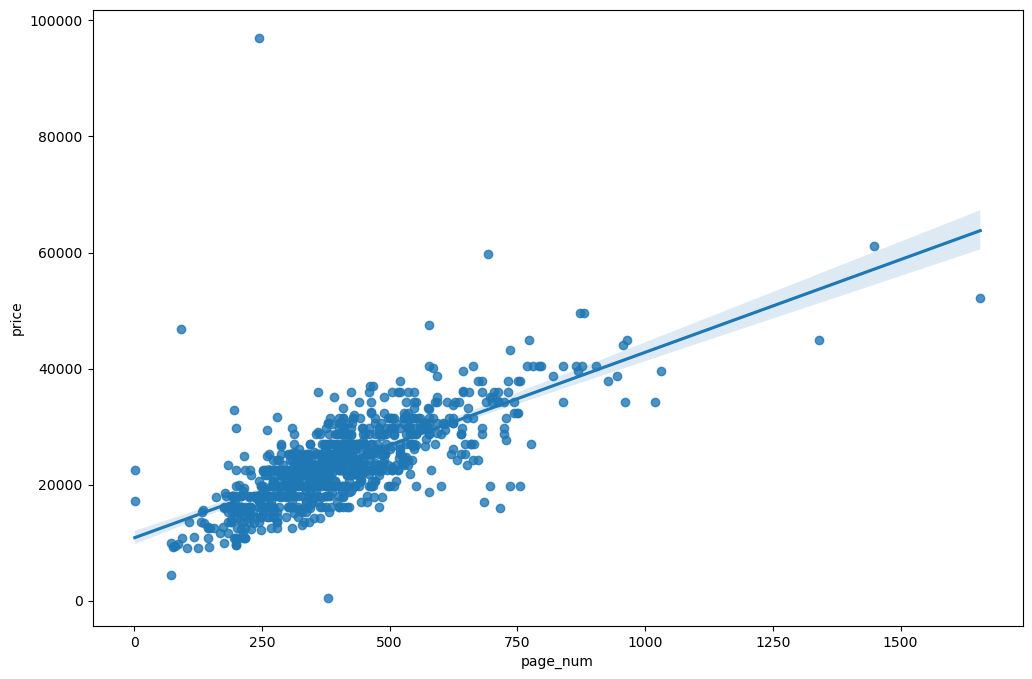

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_data)
plt.show()

- －price Outlier 제거

In [80]:
raw_data.query("price > 60000")

,title,price,publisher,isbn,link,page_num
567,"한권으로 파이썬과 드론 날로먹기: 인공지능편 (파이썬의 기초문법, 응용 예제가 한권에)",97020,잇플,9791191198188,https://search.shopping.naver.com/book/catalog...,245
786,파이썬 프로그래밍 기초부터 응용까지 세트 - 전2권 (코어 파이썬 애플리케이션 프로...,61200,에이콘출판,9788960775237,https://search.shopping.naver.com/book/catalog...,1448


In [83]:
raw_data.drop(567, inplace=True)
raw_data.reset_index(drop=True, inplace=True)
raw_data

,title,price,publisher,isbn,link,page_num
0,혼자 공부하는 파이썬 (1:1 과외하듯 배우는 프로그래밍 자습서),19800,한빛미디어,9791162245651,https://search.shopping.naver.com/book/catalog...,552
1,Do it! 점프 투 파이썬 (중학생도 첫날부터 실습하는 초고속 입문서),19800,이지스퍼블리싱,9791163034735,https://search.shopping.naver.com/book/catalog...,432
2,코딩 자율학습 나도코딩의 파이썬 입문 (초보자 눈높이에 맞춘 친절한 프로그래밍 자습서),21600,길벗,9791140703302,https://search.shopping.naver.com/book/catalog...,436
3,"실무로 통하는 인과추론 with 파이썬 (데이터 분석에서 정책 수립까지, 이론과 사...",34200,한빛미디어,9791169212113,https://search.shopping.naver.com/book/catalog...,464
4,챗GPT로 만드는 주식 & 암호화폐 자동매매 시스템 (코딩은 몰라도 누구나 할 수 ...,18000,제이펍,9791192987033,https://search.shopping.naver.com/book/catalog...,240
...,...,...,...,...,...,...
863,"OpenCV 4를 활용한 머신러닝 입문 2/e (OpenCV 4, 파이썬, scik...",36000,에이콘출판,9791161754628,https://search.shopping.naver.com/book/catalog...,536
864,실무가 훤히 보이는 머신러닝 & 딥러닝 (파이썬 실전 코딩으로 배우는 한글 자연어 ...,23400,책만,9791189909031,https://search.shopping.naver.com/book/catalog...,316
865,초보 해커를 위한 해킹 입문 세트 - 전2권 (『(개정판) 해킹: 공격의 예술』+『...,44100,에이콘출판,9788960772052,https://search.shopping.naver.com/book/catalog...,956
866,코어 파이썬 애플리케이션 프로그래밍 Core Python Applications P...,45000,에이콘출판,9788960775213,https://search.shopping.naver.com/book/catalog...,964


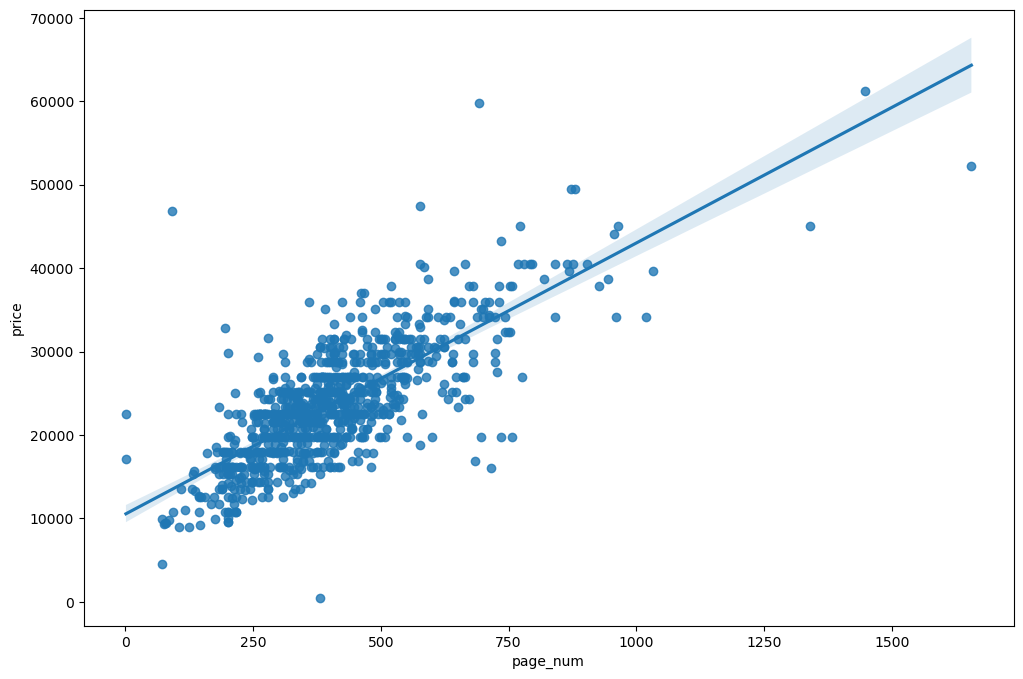

In [84]:
plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_data)
plt.show()

#### ◾ 출판사별로 확인

In [85]:
raw_data.publisher.value_counts() #--> 출판사별 파이썬 관련 책 개수

publisher
에이콘출판     93
한빛미디어     78
위키북스      46
비제이퍼블릭    45
길벗        41
          ..
에듀웨이       1
에피스테메      1
다락원        1
예솔         1
이한미디어      1
Name: count, Length: 168, dtype: int64

In [87]:
raw_data.publisher.value_counts().index[]

Index(['에이콘출판', '한빛미디어', '위키북스', '비제이퍼블릭', '길벗', '제이펍', '한빛아카데미', '인피니티북스',
       '인사이트', '영진닷컴',
       ...
       'UUP', '우리학교', '드림미디어', '영남대학교출판부', '골든래빗(주)', '에듀웨이', '에피스테메', '다락원',
       '예솔', '이한미디어'],
      dtype='object', name='publisher', length=168)

In [86]:
len(raw_data.publisher.unique()) #--> 총 출판사 개수

168

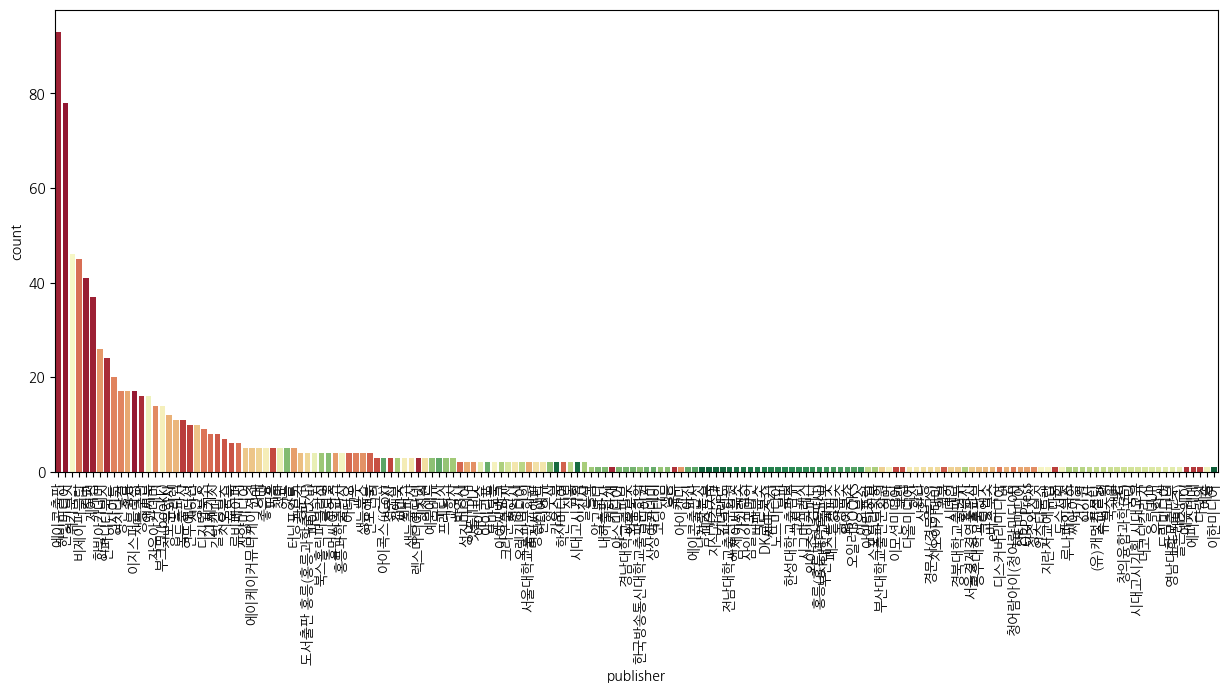

In [89]:
import koreanize_matplotlib

plt.figure(figsize=(15,6))
sns.countplot(
	data=raw_data, x='publisher', order=raw_data.publisher.value_counts().index, 
 	hue='publisher', legend=False, palette='RdYlGn'
)
plt.xticks(rotation=90)
plt.show()
#--> 출판사별 편중이 심한 듯

In [93]:
tmp = raw_data.publisher.value_counts().to_frame().reset_index()
tmp

,publisher,count
0,에이콘출판,93
1,한빛미디어,78
2,위키북스,46
3,비제이퍼블릭,45
4,길벗,41
...,...,...
163,에듀웨이,1
164,에피스테메,1
165,다락원,1
166,예솔,1


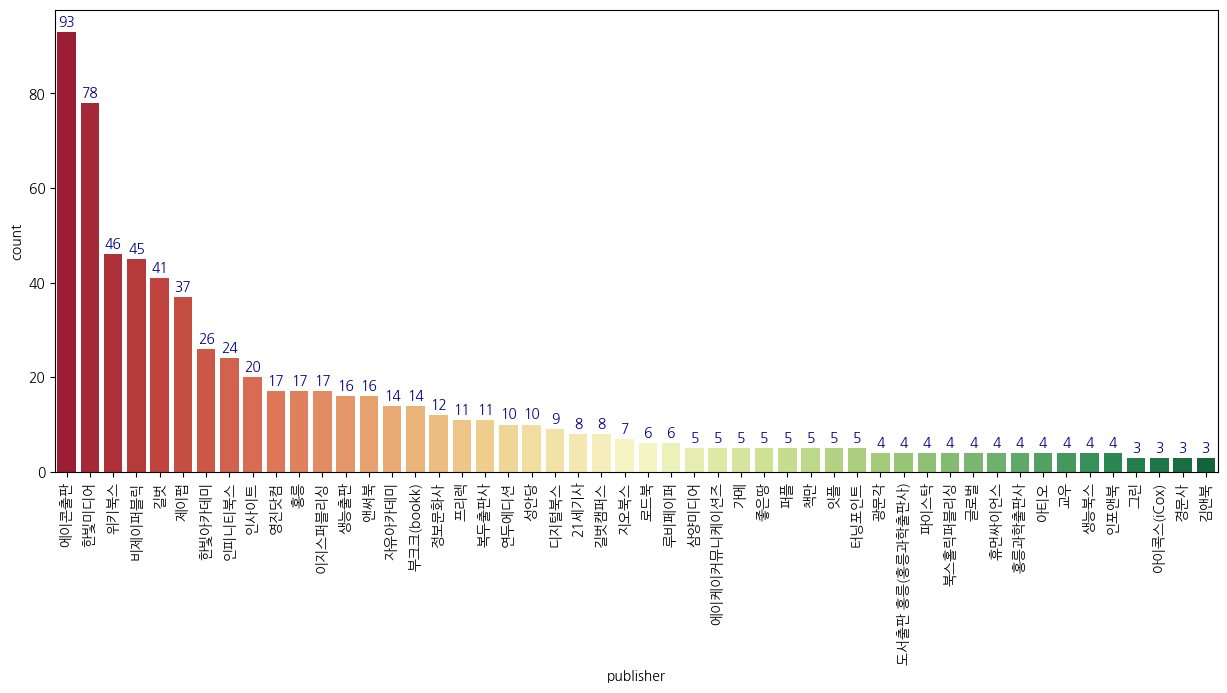

In [99]:
plt.figure(figsize=(15,6))
ax = sns.barplot(
	tmp[:50], x='publisher', y='count', hue='publisher', legend=False, palette='RdYlGn'
)
for p in ax.patches:
	ax.annotate(
		text=f"{int(p.get_height())}", xy=(p.get_x()+p.get_width()/2, p.get_height()), 
		textcoords='offset points', xytext=(0,7), ha='center', va='center', color='darkblue'
	)
plt.xticks(rotation=90)
plt.show()

- －출판사별 regplot

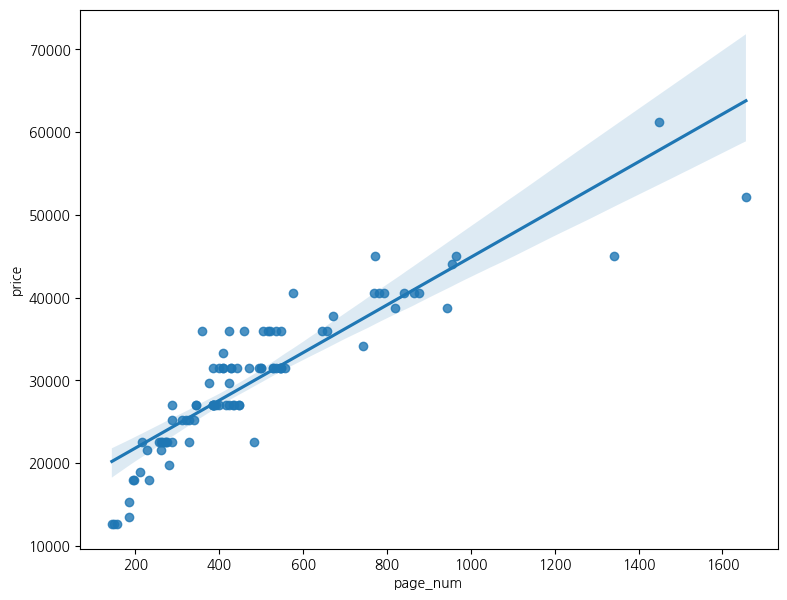

In [114]:
raw_1 = raw_data.query("publisher=='에이콘출판'")

plt.figure(figsize=(9,7))
sns.regplot(x='page_num', y='price', data=raw_1)
plt.show()

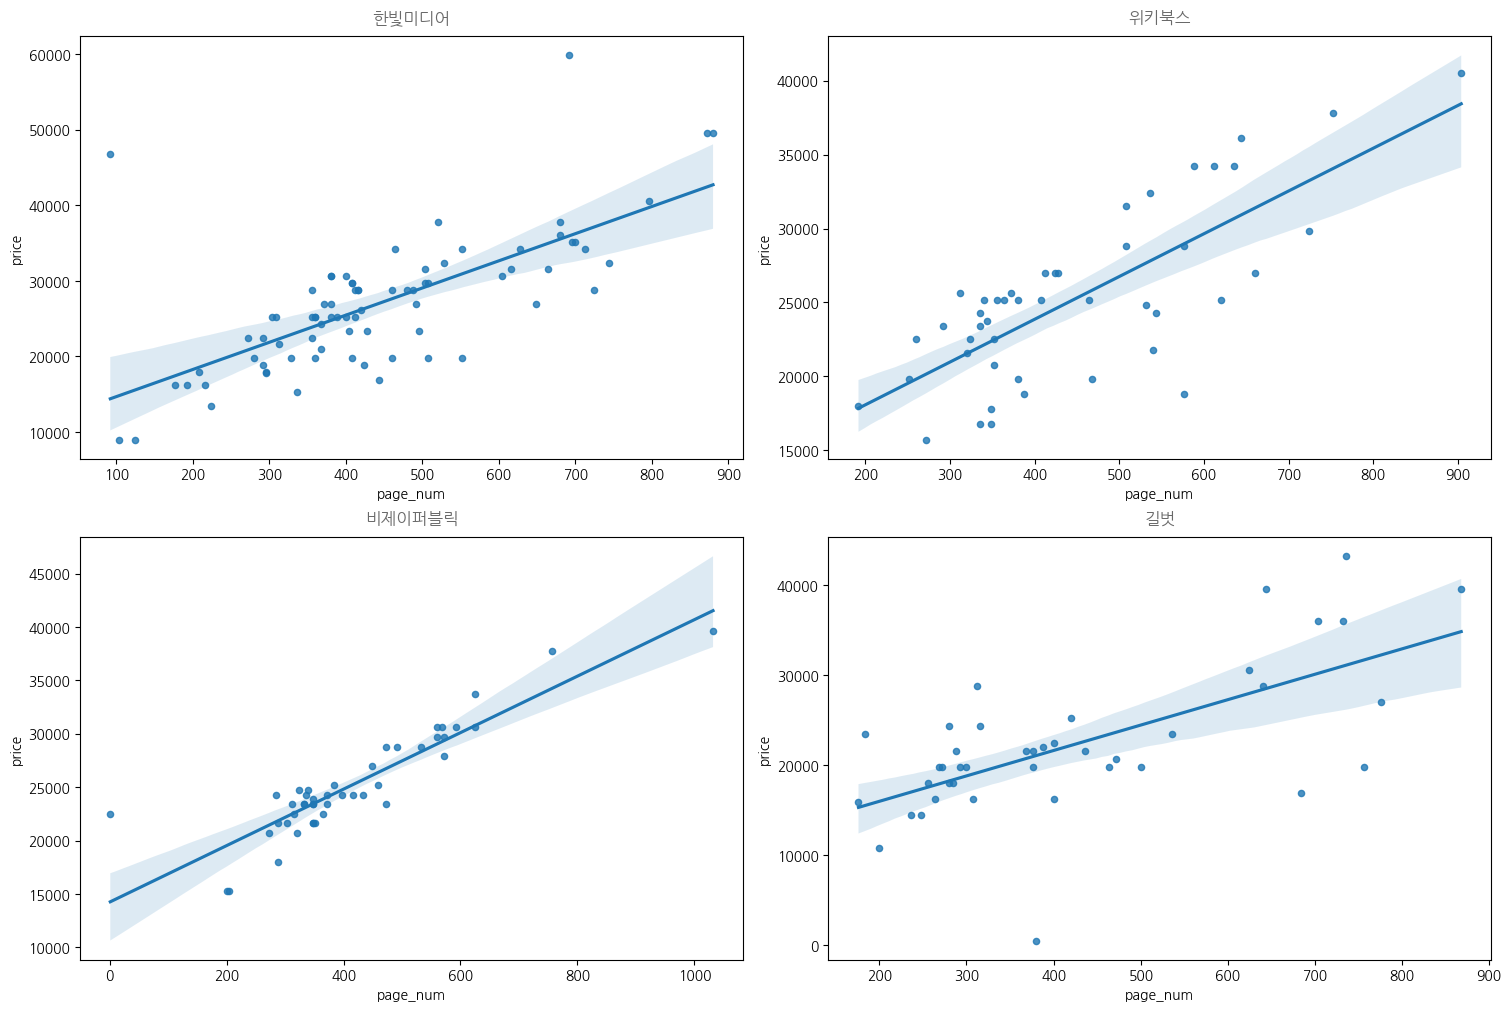

In [113]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))

for idx, row in tmp[1:5].iterrows():
    ax = fig.add_subplot(2, 2, idx)
    sns.regplot(data=raw_data[raw_data["publisher"]==row['publisher']], x='page_num', y='price', scatter_kws={'s': 20}, ax=ax)
    ax.set_title(row['publisher'], fontsize=12, color='dimgrey', pad=10)
plt.show()

- －price boxplot

In [115]:
import plotly.express as px

px.box(raw_data, y='price')

</br>

## --▶ Linear Regression

In [120]:
from sklearn.model_selection import train_test_split

# 회귀 모델 구성을 위한 데이터 나누기
X = raw_data['page_num'].values
y = raw_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

X_train, X_train.shape

(array([ 368,  684,  432,  352,  428,  426,  792,  368,  636,  392,  692,
         268,  440,  960,  840,  494,  432,  552,  480,  756,  356,  272,
         468,  516,  308,    1,  576,  424,  424,  642,  428,  504,  732,
         576,  206,  336,  572,  776,  380,  376,  322,  372,  308,  380,
         304,  400,  472,  368,  372,  144,  264,  400,  332,  236,  552,
         368,  303,  536,  192, 1341,  644,  528,  320,  124,  292,  384,
         374,  504,  284,  399,  408,  300,  364,  384,  592,  312,  328,
         374,  448,  288,  440,  360,  728,  400,  200,  752,  500,  544,
         305,  545,  200,  392,  296,  400,  280,  490,  500,  672,  456,
         264,  320,  380,  340,  604,  384,  340,  252,  336,  386,  116,
         239,  480,  374,  504,  624,  518,  484,  144,  496,  452,  200,
         328,  192,  438,  352,  408,  872,  536,  146,  544,  397,  190,
         392,  388,  244,  400,  388,  400,  464,  136,  492,  224,  348,
         232,  680,  130,  532,  416, 

In [121]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

X_train, X_train.shape

(array([[ 368],
        [ 684],
        [ 432],
        [ 352],
        [ 428],
        [ 426],
        [ 792],
        [ 368],
        [ 636],
        [ 392],
        [ 692],
        [ 268],
        [ 440],
        [ 960],
        [ 840],
        [ 494],
        [ 432],
        [ 552],
        [ 480],
        [ 756],
        [ 356],
        [ 272],
        [ 468],
        [ 516],
        [ 308],
        [   1],
        [ 576],
        [ 424],
        [ 424],
        [ 642],
        [ 428],
        [ 504],
        [ 732],
        [ 576],
        [ 206],
        [ 336],
        [ 572],
        [ 776],
        [ 380],
        [ 376],
        [ 322],
        [ 372],
        [ 308],
        [ 380],
        [ 304],
        [ 400],
        [ 472],
        [ 368],
        [ 372],
        [ 144],
        [ 264],
        [ 400],
        [ 332],
        [ 236],
        [ 552],
        [ 368],
        [ 303],
        [ 536],
        [ 192],
        [1341],
        [ 644],
        [ 528],
        

In [123]:
from sklearn.linear_model import LinearRegression

# 모델 학습
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [124]:
from sklearn.metrics import mean_squared_error

# 에러 계산
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

print("RMSE of Train Data", np.sqrt(mean_squared_error(y_train, pred_train)))
print("RMSE of Test Data", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE of Train Data 4702.472186859338
RMSE of Test Data 4570.60255656215


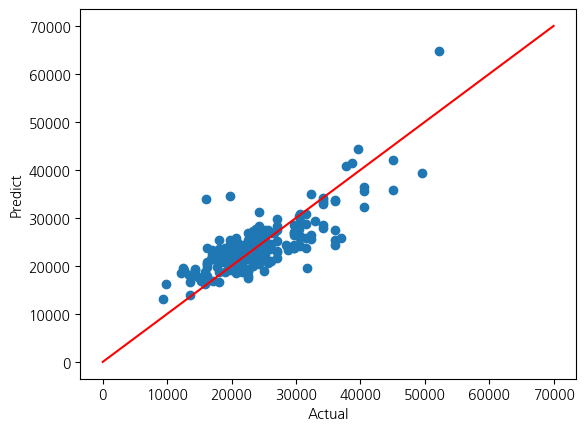

In [125]:
# 참값  vs. 예측값

plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,70000],[0,70000], 'r')
plt.show()

#### ◾ 출판사별 모델 학습

In [126]:
# 특정 출판사 것만으로 회귀모델 예측

X = raw_1['page_num'].values
y = raw_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

reg.fit(X_train, y_train)

pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

print("RMSE of Train Data", np.sqrt(mean_squared_error(y_train, pred_train)))
print("RMSE of Test Data", np.sqrt(mean_squared_error(y_test, pred_test)))

RMSE of Train Data 3814.6339925550424
RMSE of Test Data 3565.3143789507044


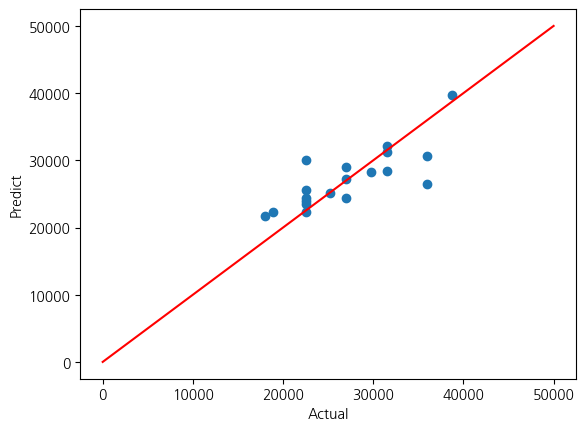

In [128]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,50000],[0,50000], 'r')
plt.show()

The END~!